In [0]:
from google.colab import drive,files

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Imports go here
import pickle
import numpy as np
from keras.utils import plot_model
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import Nadam
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, Activation,BatchNormalization
import pandas as pd
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
# dir path
datadirpath = 'gdrive/My Drive/DL Project/Data/ready_chinese_food'
labeldirpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngreLabel.txt'
IngredientList = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientList.txt'
IngredientTypeSheet = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientType.xlsx'

trainlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TR.txt'
vallistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/VAL.txt'
testlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TE.txt'

pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'
pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'

pickletraindata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y3.pkl'
picklevaldata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y3.pkl'
pickletestdata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y3.pkl'

credentialFile = 'gdrive/My Drive/DL Project/Credentials/Food-Ingredient-cred.json'
#pickleModelC_IngFood.pkl
#Models Pickled
pickleModelA1_IngFood = 'gdrive/My Drive/DL Project/PickleFiles/pickleModelA1_IngFood.pkl'

pickletraindata_X_new= 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_balancedfull.pkl'

pickletraindata_Y1_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y1full.pkl'

pickletraindata_Y2_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y2full.pkl'

pickletraindata_Y3_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y3full.pkl'



In [5]:
'''train_X = pickle.load(open(pickletraindata_X_new,'rb'))
train_Y1 = pickle.load(open(pickletraindata_Y1_new,'rb'))
train_Y2 = pickle.load(open(pickletraindata_Y2_new,'rb'))
train_Y3 = pickle.load(open(pickletraindata_Y3_new,'rb'))'''

"train_X = pickle.load(open(pickletraindata_X_new,'rb'))\ntrain_Y1 = pickle.load(open(pickletraindata_Y1_new,'rb'))\ntrain_Y2 = pickle.load(open(pickletraindata_Y2_new,'rb'))\ntrain_Y3 = pickle.load(open(pickletraindata_Y3_new,'rb'))"

In [0]:
#len(train_X),len(train_X[0]),len(train_X[0][0]),len(train_X[0][0][0]),len(train_X[0][0][0][0]),len(train_Y1),len(train_Y2),len(train_Y3)

Loading train_X

In [7]:
train_X = pickle.load(open(pickletraindata_X_new, 'rb' ))
train_X = np.array(train_X)
print(train_X.shape)

(80000, 1, 7, 7, 512)


In [8]:
train_X=train_X.reshape(train_X.shape[0],7,7,512)
print(train_X.shape)

(80000, 7, 7, 512)


Loading train_Y1

In [9]:
train_Y1 = pickle.load(open(pickletraindata_Y1_new, 'rb' ))
train_Y1 = np.array(train_Y1)
print(train_Y1.shape)

(80000, 172)


Loading train_Y2

In [10]:
train_Y2_list = pickle.load(open(pickletraindata_Y2_new, 'rb' ))
train_Y2 = np.array(train_Y2_list)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(80000, 353)


Loading val_X

In [11]:
val_X = pickle.load(open(picklevaldata_X, 'rb' ))
val_X = np.array(val_X)
print(val_X.shape)

(11016, 1, 7, 7, 512)


In [12]:
val_X=val_X.reshape(val_X.shape[0],7,7,512)
print(val_X.shape)

(11016, 7, 7, 512)


Loading val_Y1

In [13]:
val_Y1 = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1)
print(val_Y1.shape)

(11016, 172)


Loading val_Y2

In [14]:
val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0
  
print(val_Y2.shape)

(11016, 353)


In [15]:
# Loading test_X

test_X = pickle.load(open(pickletestdata_X, 'rb' ))
test_X = np.array(test_X)

print(test_X.shape)
test_X=test_X.reshape(test_X.shape[0],7,7,512)
print(test_X.shape)

# Loading test_Y1

test_Y1_list = pickle.load(open(pickletestdata_Y1, 'rb' ))
test_Y1 = np.array(test_Y1_list)
print(test_Y1.shape)

test_Y3 = pickle.load(open(pickletestdata_Y3,"rb"))
# Loading test_Y2

test_Y2_list = pickle.load(open(pickletestdata_Y2, 'rb' ))
test_Y2 = np.array(test_Y2_list)

for index in range(test_Y2.shape[0]):
  templist = test_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  test_Y2[index] = templist_0
  
print(test_Y2.shape)

(33154, 1, 7, 7, 512)
(33154, 7, 7, 512)
(33154, 172)
(33154, 353)


In [0]:
train_Y3 = np.array(pickle.load(open(pickletraindata_Y3_new,"rb")))
val_Y3 = pickle.load(open(picklevaldata_Y3,"rb"))


In [0]:
def get_f1(y_true, y_pred): #https://mc.ai/how-to-add-user-defined-function-get-f1-score-in-keras-metrics/
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val



**Architecture C**

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 7, 7, 2048)   9439232     input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 7, 7, 2048)   9439232     input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 4, 4, 2048)   0           conv2d_14[0][0]                  
____________________________________________________________________________________________

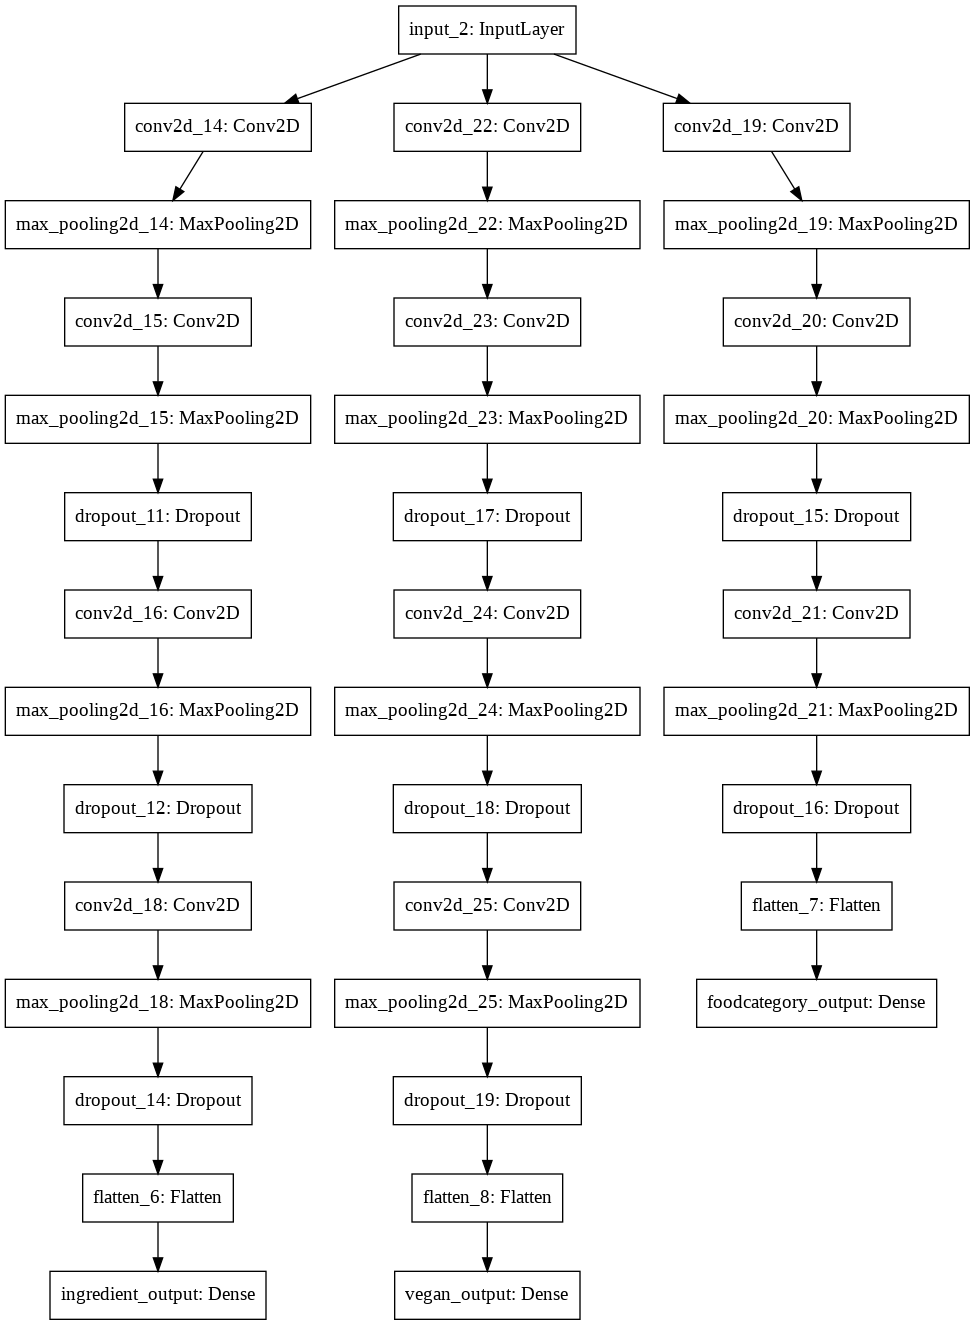

In [0]:
import tensorflow as tf
inputs = Input(shape=(7,7,512))
inputs_1 = Flatten()(inputs)
 
conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(maxPool2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

conv2D13 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D13 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D13)
dropout13 = Dropout(0.5)(maxPool2D13)

conv2D13 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D13 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D13)
dropout13 = Dropout(0.5)(maxPool2D13)

flattened3 = Flatten()(dropout13)

conv2D4 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.5)(maxPool2D6)

flattened6 = Flatten()(dropout6)

conv2D7 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D7 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D7)
#dropout7 = Dropout(0.3)(maxPool2D7)

conv2D8 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D7)
maxPool2D8 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D8)
dropout8 = Dropout(0.3)(maxPool2D8)

conv2D9 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout8)
maxPool2D9 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D9)
dropout9 = Dropout(0.5)(maxPool2D9)

conv2D11 = Conv2D(256, kernel_size=3, activation='relu',padding='same')(dropout9)
maxPool2D11 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D11)
dropout11 = Dropout(0.5)(maxPool2D11)

conv2D12 = Conv2D(32, kernel_size=3, activation='relu',padding='same')(dropout11)
maxPool2D12 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D12)
dropout12 = Dropout(0.5)(maxPool2D12)

flattened9 = Flatten()(dropout11)

output1 = Dense(353,activation='sigmoid',name='ingredient_output')(flattened3)  ##  Ingredient recognition
output2 = Dense(172,activation='softmax',name='foodcategory_output')(flattened6) ##  Food categorization
output3 = Dense(1,activation='sigmoid',name='vegan_output')(flattened9) ##  Vegan categorization

model_C = Model(inputs=inputs, outputs=[output1,output2,output3]) # Defining model with Architecture A3
print(model_C.summary()) # summarize layers
plot_model(model_C, to_file='gdrive/My Drive/DL Project/Multi-task Vegan Architecture C.png') # plot graph

In [0]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

model_C.compile(optimizer=Adam(lr=0.00005),
              loss={'ingredient_output': 'binary_crossentropy', 'vegan_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[get_f1,top5_acc])


In [0]:
model_C.fit(train_X, [train_Y2,train_Y1,train_Y3], batch_size=256, epochs=40,validation_data = (val_X, [val_Y2, val_Y1, val_Y3]))

Train on 80000 samples, validate on 11016 samples
Epoch 1/40
80000/80000 [==============================] - 108s 1ms/step - loss: 7.1059 - ingredient_output_loss: 0.1797 - foodcategory_output_loss: 6.6105 - vegan_output_loss: 0.3156 - ingredient_output_get_f1: 0.0223 - ingredient_output_top5_acc: 0.0498 - foodcategory_output_get_f1: 0.0849 - foodcategory_output_top5_acc: 0.2418 - vegan_output_get_f1: 0.8587 - vegan_output_top5_acc: 1.0000 - val_loss: 5.0165 - val_ingredient_output_loss: 0.0443 - val_foodcategory_output_loss: 4.4463 - val_vegan_output_loss: 0.5259 - val_ingredient_output_get_f1: 0.0000e+00 - val_ingredient_output_top5_acc: 0.3946 - val_foodcategory_output_get_f1: 0.0685 - val_foodcategory_output_top5_acc: 0.2399 - val_vegan_output_get_f1: 0.8706 - val_vegan_output_top5_acc: 1.0000
Epoch 2/40
80000/80000 [==============================] - 101s 1ms/step - loss: 3.3853 - ingredient_output_loss: 0.0529 - foodcategory_output_loss: 3.2140 - vegan_output_loss: 0.1185 - ingredi

In [0]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model_C.to_json()
with open('gdrive/My Drive/DL Project/Models/ModelC_All3.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_C.save_weights('gdrive/My Drive/DL Project/Models/ModelC_All3.h5')
print("Saved model to disk")

In [0]:
## prediction on test

results = model_C.evaluate(test_X, [test_Y2,test_Y1, test_Y3], batch_size=128)
print(results)
'''print('Ingredient F1:', results[3])
print('Ingredient Top5:', results[4])
print('Food F1:', results[5])
print('Food Top5:', results[6])'''

print('Generate predictions for all samples')
predictions = model_C.predict(test_X)


predictions_ingredients=1*(predictions[0] >= 0.5)
predictions_vegan=1*(predictions[2] >= 0.5)
#predictions_ingredients

33154/33154 [==============================] - 16s 489us/step
[3.6172203780867376, 0.025217423674736953, 1.7040435278157515, 1.887959415735197, 0.5118819101013407, 0.6043313024069494, 0.6640209266322078, 0.8666224286662243, 0.8314635465118791, 1.0]
Generate predictions for all samples


In [0]:
print('Ingredient F1:', results[4])
print('Ingredient Top5:', results[5])
print('Food F1:', results[6])
print('Food Top5:', results[7])
print('Vegan F1:', results[8])
print('Vegan Top5:', results[9])

Ingredient F1: 0.5118819101013407
Ingredient Top5: 0.6043313024069494
Food F1: 0.6640209266322078
Food Top5: 0.8666224286662243
Vegan F1: 0.8314635465118791
Vegan Top5: 1.0


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_Y2, predictions_ingredients))

              precision    recall  f1-score   support

           0       0.56      0.42      0.48      6698
           1       0.61      0.31      0.41       666
           2       0.35      0.05      0.08       731
           3       0.72      0.51      0.60       144
           4       0.64      0.66      0.65       435
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        46
           8       0.63      0.58      0.61       868
           9       0.25      0.05      0.08       365
          10       0.00      0.00      0.00        41
          11       0.64      0.20      0.31       699
          12       0.48      0.22      0.30       387
          13       0.60      0.21      0.31      1639
          14       0.50      0.03      0.05        76
          15       0.68      0.20      0.31      4353
          16       0.45      0.20      0.28      1138
          17       0.47    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [0]:
print(classification_report(test_Y3, predictions_vegan))

              precision    recall  f1-score   support

           0       0.70      0.21      0.32      6666
           1       0.83      0.98      0.90     26488

    accuracy                           0.82     33154
   macro avg       0.77      0.59      0.61     33154
weighted avg       0.80      0.82      0.78     33154



In [20]:
from keras.models import model_from_json
# load json and create model
json_file = open('gdrive/My Drive/DL Project/Models/ModelC_All3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('gdrive/My Drive/DL Project/Models/ModelC_All3.h5')
print("Loaded model from disk")






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Loaded model from disk


In [23]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

loaded_model.compile(optimizer=Adam(lr=0.00005),
              loss={'ingredient_output': 'binary_crossentropy', 'vegan_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[get_f1,top5_acc])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
## prediction on test

results = loaded_model.evaluate(test_X, [test_Y2,test_Y1,test_Y3], batch_size=128)
#print(results)
print('Ingredient F1:', results[3])
print('Ingredient Top5:', results[4])
print('Food F1:', results[5])
print('Food Top5:', results[6])

print('Generate predictions for all samples')
predictions = loaded_model.predict(test_X)


predictions_ingredients=1*(predictions[0] >= 0.5)
predictions_vegan=1*(predictions[2] >= 0.5)
#predictions_ingredients

33154/33154 [==============================] - 19s 571us/step
Ingredient F1: 1.0696416211076973
Ingredient Top5: 0.1354273028117566
Food F1: 0.46977740242504673
Food Top5: 0.7158957386956023
Generate predictions for all samples


In [33]:
def compare_lists(l1, l2):
  for i in range(353):
    if l1[i]!=l2[i]:
      return False
  return True

[print(i) for i in range(1000) if predictions_vegan[i]==test_Y3[i] and predictions_vegan[i]==0]

862
864
867
868
871
872
873
875
876
879
881
882
883
885
887
888
889
890
891
893
895
896
898
899
900
901
904
905
906
909
910
912
913
914
915
916
918
920
922
924
925
928
929
931
932
934
935
937
940
942
943
948
949
958
961
962
963
964
965
967
969
970
971
972
973
974
975
976
978
979
980
981
982
983
984
985
986
988
989
990
991
995
996
997
999


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [0]:
indices = [(i,item) for i,item in enumerate(predictions[0][33153]) if item in sorted(predictions[0][33153])[-5:353]]

In [44]:
indices

[(0, 0.4760716),
 (15, 0.244733),
 (21, 0.28891468),
 (58, 0.27287284),
 (95, 0.26222408)]

In [45]:
[print(i) for i in range(len(predictions_ingredients)-100,len(predictions_ingredients)) if compare_lists(predictions_ingredients[i],test_Y2[i])]

[]

In [46]:
print(len(predictions_ingredients))

33154


In [0]:
def compare_lists(l1, l2):
  for i in range(353):
    if l1[i]!=l2[i]:
      return False
  return True

In [47]:
foodList = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/FoodList.txt'
f = open(foodList,'r')
count=0
for i in f:
  if count==98:
    print(count,i)
  count+=1

98 Sautéed Shrimps with Celery



In [0]:
#foodList = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/FoodList.txt'
f = open(IngredientList,'r')
count=0
i_list = []
for i in f:
  if predictions_ingredients[33153][count]==1:
    print(count,i)
  i_list.append(i)
  count+=1

In [49]:
prob_list = [[i,item,i_list[i]] for i,item in indices]
prob_list

[[0, 0.4760716, 'Minced green onion\n'],
 [15, 0.244733, 'Crushed pepper\n'],
 [21, 0.28891468, 'Chinese Parsleycoriander\n'],
 [58, 0.27287284, 'Crushed hot and dry chili\n'],
 [95, 0.26222408, 'Crushed garlic\n']]

Text(0, 0.5, 'Probability')

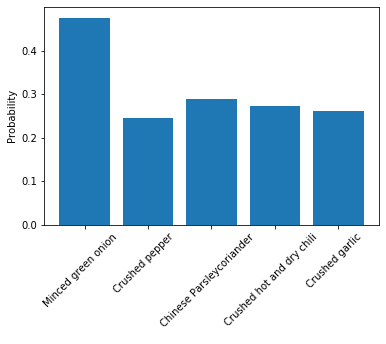

In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.arange(5)
plt.bar(x, height= [p[1] for p in prob_list])
plt.xticks(x, [p[2] for p in prob_list],rotation=45)
plt.ylabel('Probability')